In [1]:
import os
import pandas as pd
import json

import model_funcs
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.set_default_dtype(torch.float64)

MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'
FEATURES_DIR = '/scratch/ci411/sonos_rirs/features/'

Using device: cpu



In [2]:
#load featuresets and build dataloader for test evaluation
baseline_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_baseline','feature_df.csv'))
prop1_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop1','feature_df.csv'))
prop2_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop2','feature_df.csv'))
prop3_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop3','feature_df.csv'))
prop4_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop4','feature_df.csv'))

baseline_dl = model_funcs.create_dataloader(baseline_df[baseline_df['split']=='test'])
prop1_dl = model_funcs.create_dataloader(prop1_df[prop1_df['split']=='test'])
prop2_dl = model_funcs.create_dataloader(prop2_df[prop1_df['split']=='test'])
prop3_dl = model_funcs.create_dataloader(prop3_df[prop1_df['split']=='test'])
prop4_dl = model_funcs.create_dataloader(prop4_df[prop1_df['split']=='test'])


name: 080422_prop0nl 
notes: mag + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_baseline/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080422_prop0nl 
1000 epochs completed
Current results:
duration: 	 68.4898853302002
train_loss: 	 16779754.057324093
val_loss: 	 16696476.399792872
val_bias: 	 -0.36217155182702676
val_pearson_cor: 	 -1.4964308588304342e-15
val_mean_mult: 	 7.099565635347068
val_var_ratio: 	 4.785487884902709e-15


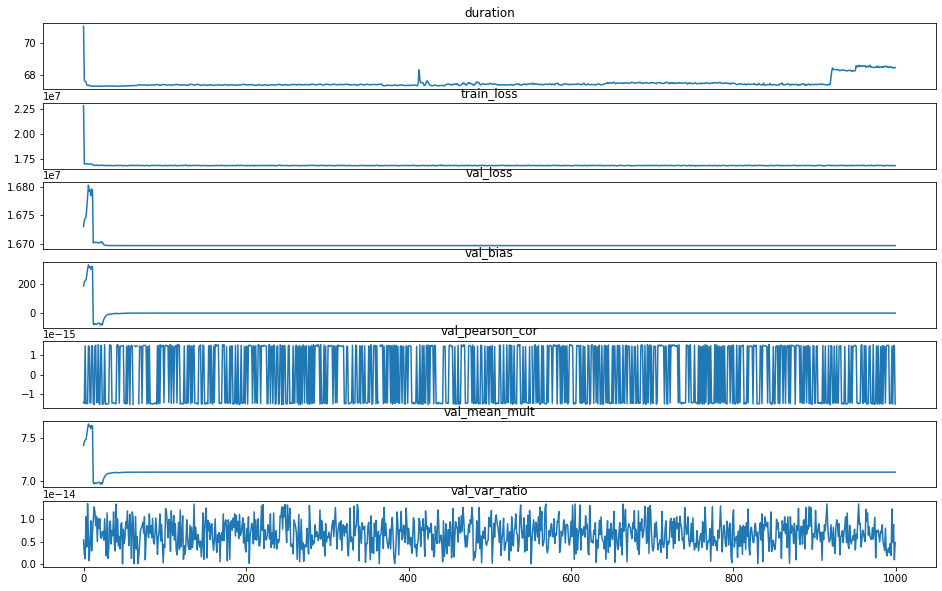

In [20]:
model_name = "080422_prop0nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print("Current results:")
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [4]:
dataloader = baseline_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 4254408.832382407 
bias: 2054.6776731485506 
pearson_cor: -0.01325925467930905 
mean_mult: inf 
var_ratio: 269.52028395295133 


name: 080422_prop1nl 
notes: phase + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop1/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080422_prop1nl 
1000 epochs completed
Current results:
duration: 	 67.24805212020874
train_loss: 	 16792864.125634182
val_loss: 	 16531646.24331185
val_bias: 	 -5.4119381833171225
val_pearson_cor: 	 1.396079916545757e-15
val_mean_mult: 	 6.97000514711514
val_var_ratio: 	 5.368509774842848e-15


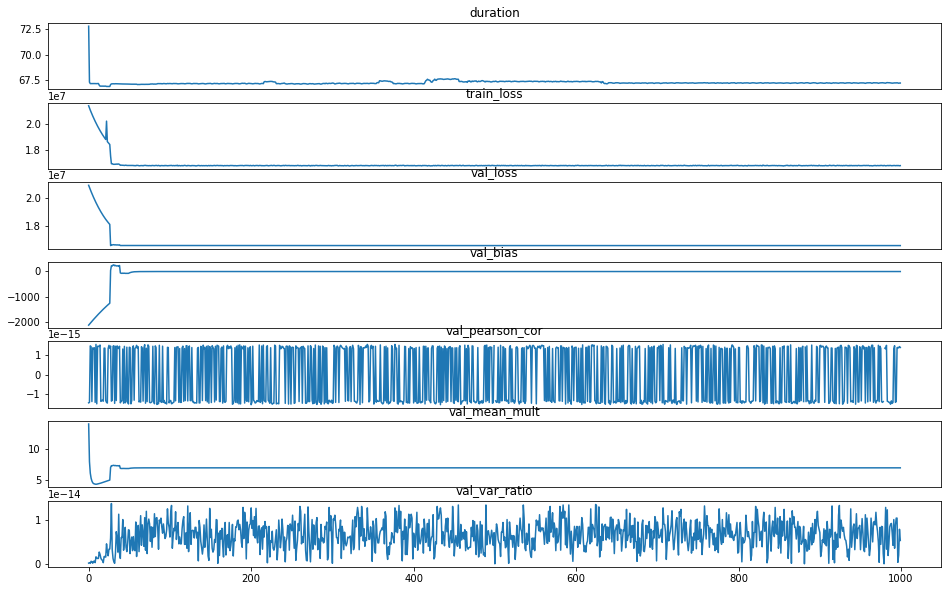

In [21]:
model_name = "080422_prop1nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [6]:
dataloader = prop1_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 607795.0850035406 
bias: 779.6118484862167 
pearson_cor: 6.73050965399169e-17 
mean_mult: inf 
var_ratio: 2.0151700721102827e-11 


name: 080422_prop2nl 
notes: phase + 1st deriv lf 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop2/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080422_prop2nl 
1000 epochs completed
Current results:
duration: 	 69.41578722000122
train_loss: 	 16971149.904540185
val_loss: 	 15810398.017753333
val_bias: 	 -295.01328946933484
val_pearson_cor: 	 -1.7530354772142965e-15
val_mean_mult: 	 6.520883595806249
val_var_ratio: 	 3.0964294645407558e-15


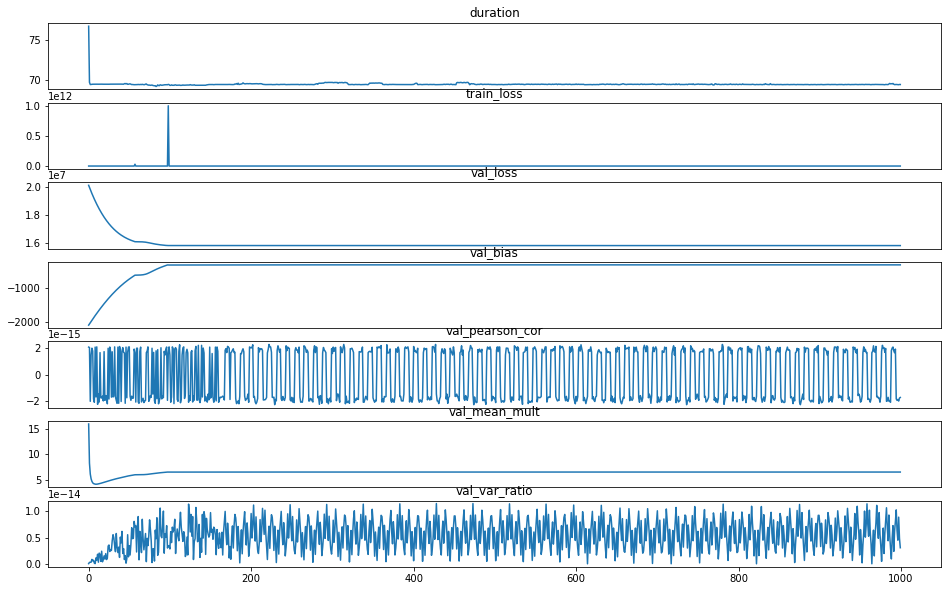

In [22]:
model_name = "080422_prop2nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))

    if i<len(keys)-1:
        ax[i].set_xticks([])

In [8]:
dataloader = prop2_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 578743.3201837409 
bias: 760.75151625238 
pearson_cor: -1.6117311824153016e-16 
mean_mult: inf 
var_ratio: 1.0837889463450259e-11 


name: 080422_prop3nl 
notes: mag+ lf phase + lf 1st deriv 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop3/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080422_prop3nl 
851 epochs completed
Current results:
duration: 	 82.49290943145752
train_loss: 	 17024086.954667747
val_loss: 	 16512226.609371085
val_bias: 	 -430.10742297605935
val_pearson_cor: 	 2.3573964405177873e-15
val_mean_mult: 	 6.415851924203481
val_var_ratio: 	 4.501672097426361e-15


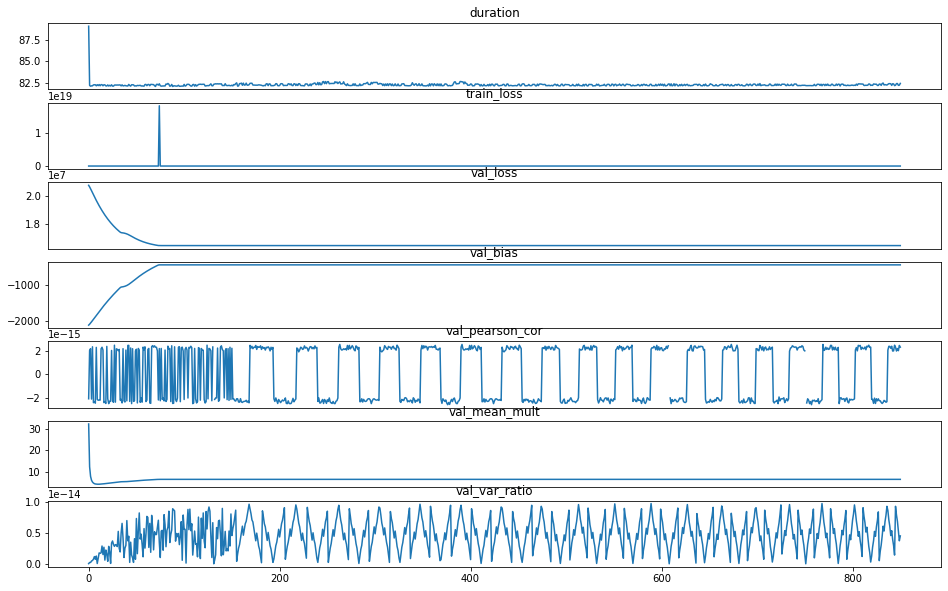

In [23]:
model_name = "080422_prop3nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [10]:
dataloader = prop3_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 426727.9785339483 
bias: 653.243850204875 
pearson_cor: -3.952453853573122e-17 
mean_mult: inf 
var_ratio: 2.370788320129744e-12 


name: 080422_prop4nl 
notes: mag+ lf phase + lf 5 feats 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop4/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080422_prop4nl 
866 epochs completed
Current results:
duration: 	 80.82768106460571
train_loss: 	 18016944.713005103
val_loss: 	 17184688.798461072
val_bias: 	 -1122.1944429141154
val_pearson_cor: 	 8.390400221893422e-16
val_mean_mult: 	 4.9869280391867035
val_var_ratio: 	 3.019752207981109e-15


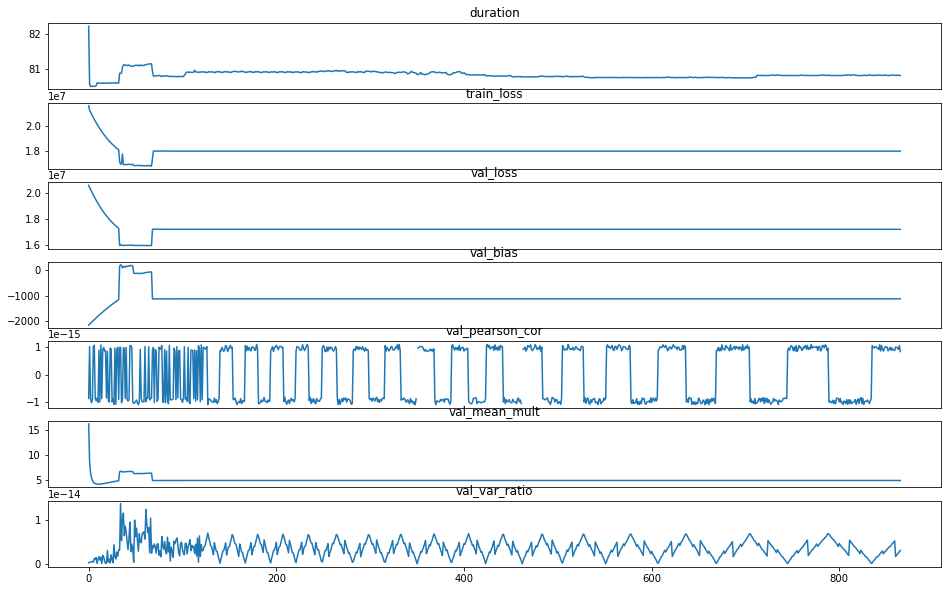

In [24]:
model_name = "080422_prop4nl"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [ ]:
dataloader = prop4_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics
